<a href="https://colab.research.google.com/github/ktsim01/FIFA-World-Cup-2022-Prediction/blob/main/World_Cup_2022_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
results = pd.read_csv('results.csv')

In [13]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Create new columns showing who won and the goal differences

In [14]:
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


Checking what the data looks like with a box plot.

([<matplotlib.axis.XTick at 0x7fa2d76cacd0>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

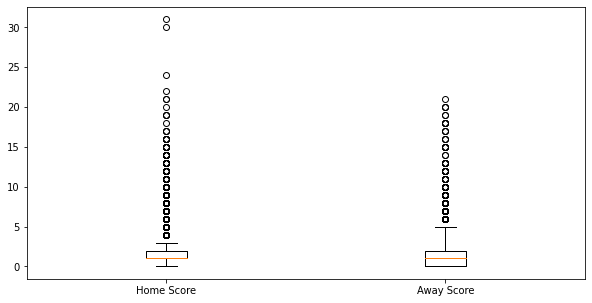

In [15]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot([results["home_score"],results["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

Let's remove all the outliers so as to make the model more accurate

In [16]:
goal_max=15 #Maximum goals one team can score is limited to 15
results=results[(results["home_score"]<goal_max) & (results["away_score"]<goal_max)]
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


Group Stage for the Qatar World Cup 2022:

**Group A**: Qatar, Ecuador, Senegal, Netherlands 

**Group B**: England, Iran, USA, Wales 

**Group C**: Argentina, Saudi Arabia, Mexico, Poland 

**Group D**: France, Denmark, Tunisia, Australia 

**Group E**: Spain, Germany, Japan , Costa Rica

**Group F**: Belgium, Canada, Morocco, Croatia 

**Group G**: Brazil, Serbia, Switzerland, Cameroon 

**Group H**: Portugal, Ghana, Uruguay, South Korea

From here, we will filter the data to the selected teams and only use data after 1930. In addition, irrelevant data will be dropped

In [17]:
worldcup_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands'
                  'England', 'Iran', 'USA', 'Wales',
                  'Argentina', 'Saudia Arabia', 'Mexico', 'Poland'
                  'France', 'Denmark', 'Tunisia', 'Australia'
                  'Spain', 'Germany', 'Japan', 'Costa Rica'
                  'Belgium', 'Canada', 'Morocco', 'Croatia'
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Urugay', 'South Korea']

df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country',
                               'goal_difference', 'match_year'], axis = 1)

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
7,Wales,Scotland,False,Scotland
12,Wales,Scotland,False,Scotland
14,Wales,England,False,England
18,Wales,Scotland,False,Scotland
20,Wales,Northern Ireland,False,Wales
